In [1]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt

In [2]:
def get_euc_dist(x1,y1,x2,y2):
    coord1 = np.array((x1,y1))
    coord2 = np.array((x2,y2))
    return np.linalg.norm(coord1-coord2)

In [3]:
def get_maxima_minima_euc_dist(x_array,y_array):
    
    v_maxima = signal.argrelextrema(y_array, np.greater)[0]
    max_df = pd.DataFrame({'idx': x_array[v_maxima], 'val': y_array[v_maxima]}, columns=['idx', 'val'])
    max_df['type'] = 'maxima'

    v_minima = signal.argrelextrema(y_array, np.less)[0]
    min_df = pd.DataFrame({'idx': x_array[v_minima], 'val': y_array[v_minima]}, columns=['idx', 'val'])
    min_df['type'] = 'minima'

    concat_srt_df = pd.concat([max_df,min_df]).sort_values(by=['idx'])
    concat_srt_df['idx_nxt'] = concat_srt_df['idx'].shift(-1)
    concat_srt_df['val_nxt'] = concat_srt_df['val'].shift(-1)
    concat_srt_df['euc_dist'] = concat_srt_df.apply(lambda x: get_euc_dist(x.idx,x.val,x.idx_nxt,x.val_nxt),axis=1)
    
    return concat_srt_df
    

In [4]:
def get_boundaries(p_df,euc_dist_thresh):
    return p_df.loc[p_df['euc_dist'] >= p_df['euc_dist'].quantile(q=euc_dist_thresh)]

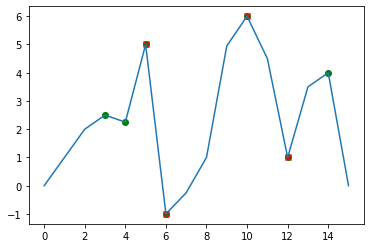

In [5]:
arr_y = np.array([0,1,2,2.5,2.25,5,-1,-.25,1,4.95,6,4.5,1,3.5,4,0])
arr_x = np.arange(0,len(arr_y))

mmed_df = get_maxima_minima_euc_dist(arr_x,arr_y)
bound_df = get_boundaries(get_maxima_minima_euc_dist(arr_x,arr_y),0.25)


plt.plot(arr_x,arr_y)
plt.scatter(mmed_df['idx'],mmed_df['val'], c='green')
plt.scatter(bound_df['idx'],bound_df['val'], c='red',marker='x')
plt.show()